In [1]:
import sys
from pathlib import Path

# Get the directory of the notebook, go up one level to the project root
root_dir = Path.cwd().parent 

# Add the project root to the system path
if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))

# Now you can import using the folder name
from config.paths_config import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(PROJECT_DIR / TRAIN_FILE_PATH)
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='str')

**Booking_ID**: Unique identifier of each reservation. <br>
**no_of_adults**: Number of Adults in the reservation. <br>
**no_of_children**: Number of Children in the reservation. <br>
**no_of_weekend_nights**: Number of nights on weekends in the reservation. <br> Price tends to be higher during weekends
**no_of_week_nights**: Number of nights during week days Monday-Friday in the reservation. <br>
**type_of_meal_plan**:  Meals plans: Luxury vs standard meals <br>
**required_car_parking_space**: Does this person require a parking space? <br>
**room_type_reserved**: Which type of room has been reserved? <br>
**lead_time**: Difference of days between reservation date and actual arrival date. <br>
**arrival_year**: At which time did this person arrive? (Year) <br>
**arrival_month**: At which time did this person arrive? (Monnth) <br>
**arrival_date**: At which time did this person arrive? (Year) <br>
**market_segment_type**: How did this person make the reservation? Online, Offline, etc. <br>
**repeated_guest**: Is the person a repeated guess? <br>
**no_of_previous_cancellations**: How many reservations has this person cancelled before? <br>
**no_of_previous_bookings_not_canceled**: Inverse of previous feature. <br>
**avg_price_per_room**: Average price at the time of reservation (Euros) <br>
**no_of_special_requests**: Number of special requests like accomodations, specific types of rooms, etc. <br>
**booking_status**: Has the booking been cancelled? <br>


In [5]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [6]:
df.shape

(29020, 18)

### Check for missing values

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Removing Duplicate Values

In [8]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

7661
(21359, 18)


#### Number of Adults

In [9]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

#### Number of Children

In [10]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

Most of the people who reserve at this hotel do not have children or do not visit the hotel with their children.

#### Week vs Weekends

In [11]:
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [12]:
df["no_of_week_nights"].value_counts()

no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

In [13]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64

Most people get a standard meal plan, there is a considerable amount of people who did not select a type of meal.

In [14]:
df["required_car_parking_space"].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

most people do not reserve a parking spot

In [15]:
df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

Most poeple opt for a Type 1 Room. could it be due to price? 

In [16]:
df["arrival_year"].value_counts()

arrival_year
2018    18141
2017     3218
Name: count, dtype: int64

Reservation dataset contains data from 2018 mostly.

In [17]:
df["arrival_month"].value_counts().sort_values(ascending=False)

arrival_month
10    2663
9     2525
8     2477
12    1928
7     1893
11    1817
4     1695
3     1611
6     1543
5     1522
2     1067
1      618
Name: count, dtype: int64

Most reservations occur during the Fall season, winter is the season with least reservations overall. 

In [18]:
df["market_segment_type"].value_counts().sort_values(ascending=False)

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64

Most activity to reserve a hotel is done online. Hopefully they have an amazing website that attracts new clients.

In [19]:
df["repeated_guest"].value_counts()

repeated_guest
0    20667
1      692
Name: count, dtype: int64

Only a few people reserve again with the hotel.

In [20]:
df["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

Most people do not cancel but we can see also a few of the scammers with 11 and 13 cancellations. **Imbalanced data.**

In [21]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [22]:
6128/15231

0.4023373383231567

Over 40% of the people reserving at this hotel has cancelled at least once.

In [23]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='str')

In [24]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',  
            'market_segment_type', 'repeated_guest',  'booking_status']

num_cols = list(set(df.columns) - set(cat_cols))

In [25]:

num_cols

['arrival_date',
 'no_of_special_requests',
 'arrival_month',
 'no_of_weekend_nights',
 'no_of_previous_cancellations',
 'arrival_year',
 'no_of_children',
 'no_of_week_nights',
 'lead_time',
 'no_of_adults',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room']

## Exploratory Data Analysis

In [74]:
data = df.copy()

### Univariate analysis

In [75]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))

    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")

        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[1][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")


C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1499719266.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1499719266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, ax=axes[1][1], palette="Blues")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1499719266.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1499719266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the

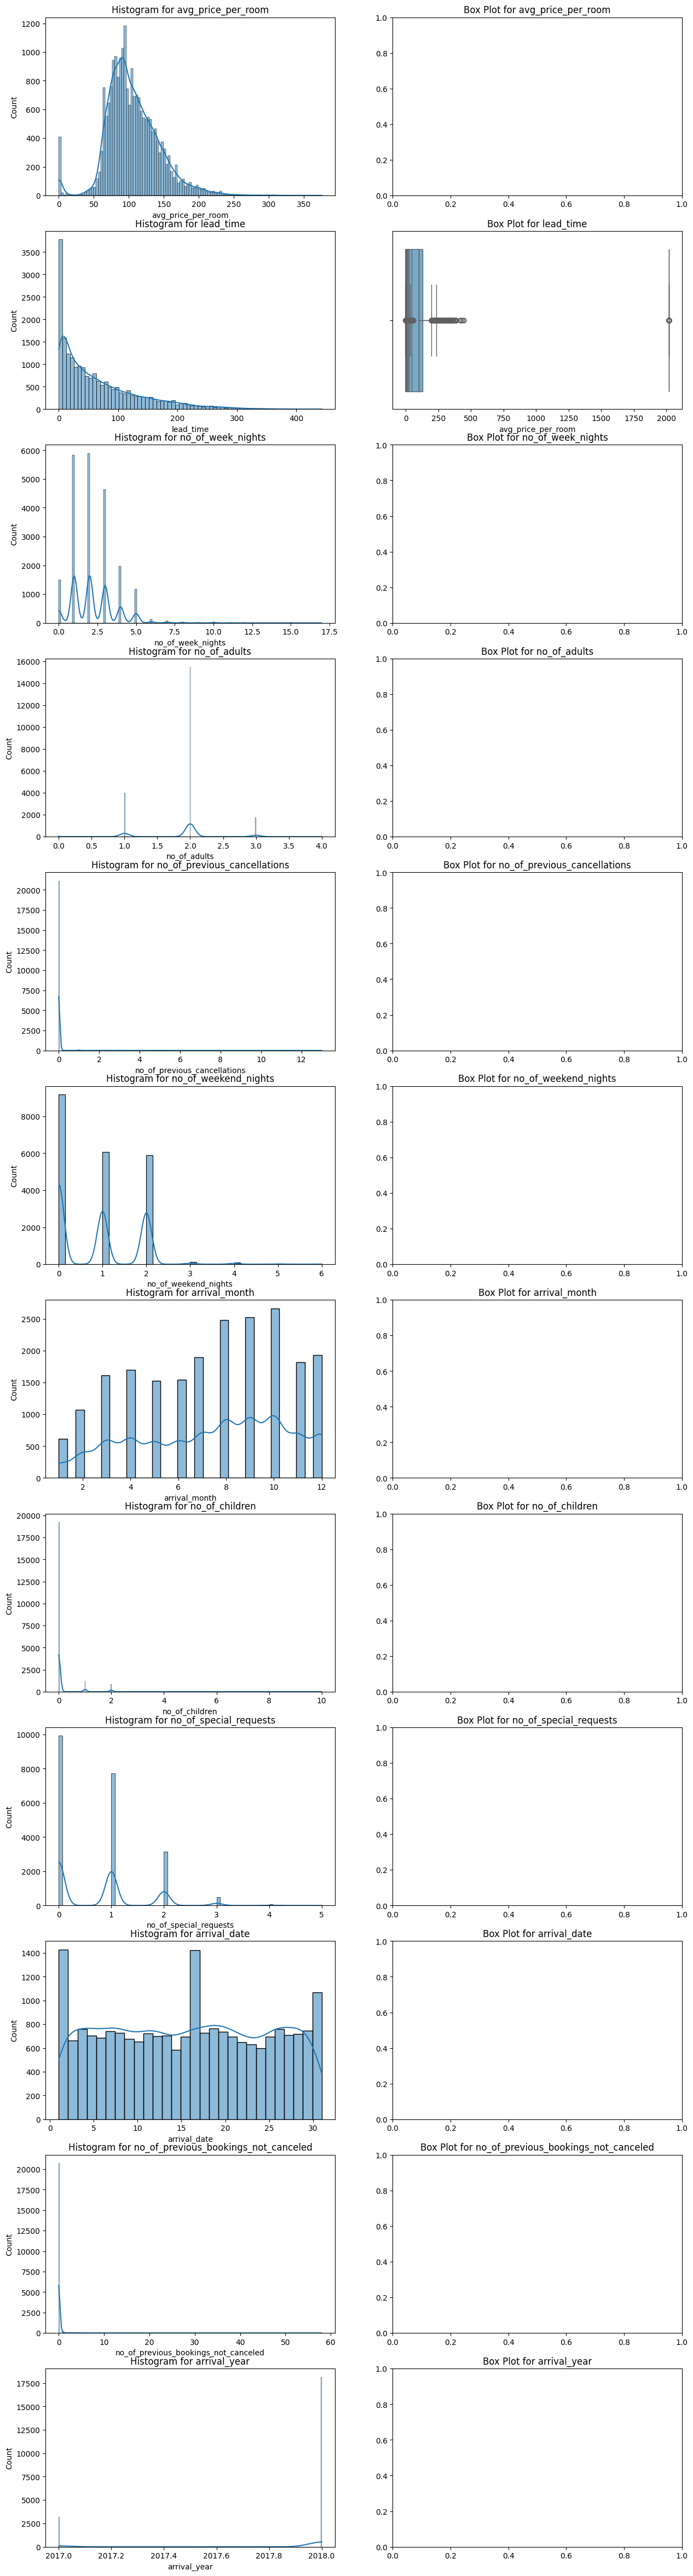

In [76]:
num_plot_dist(data, num_cols)

# Categorical features

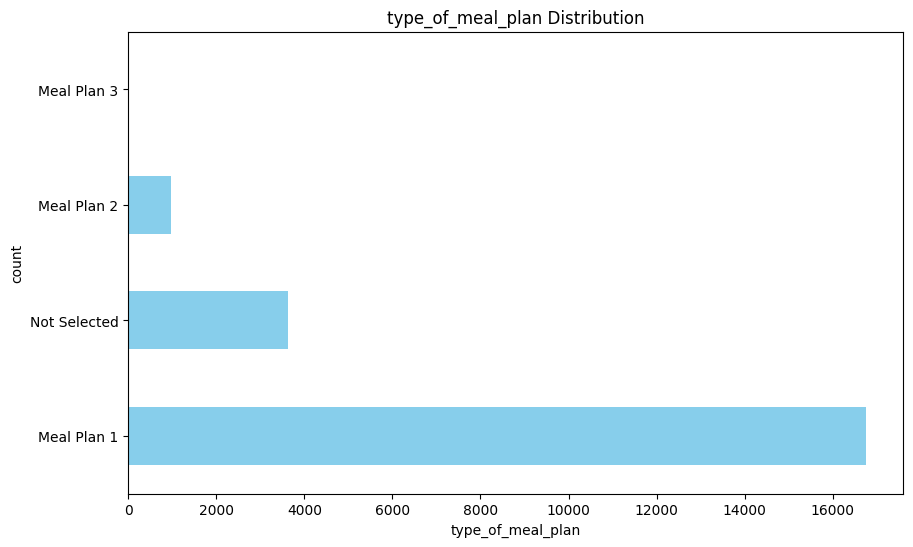

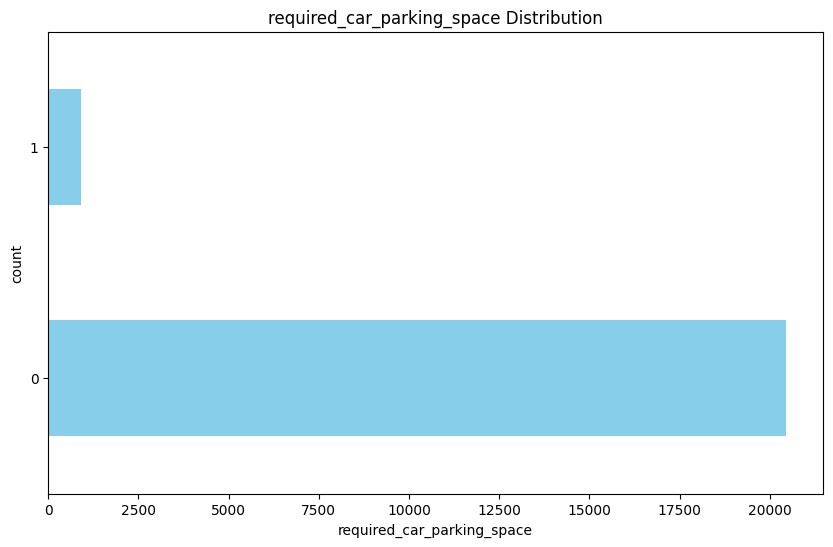

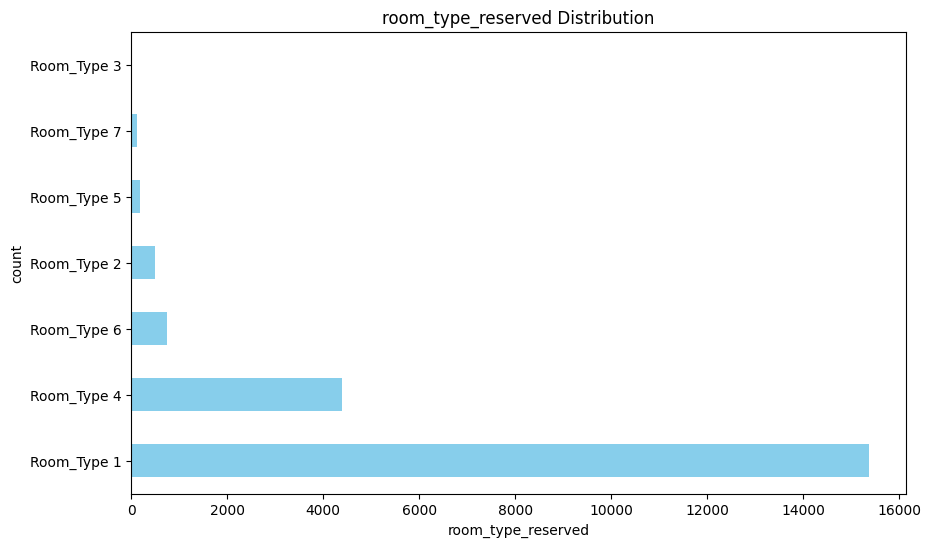

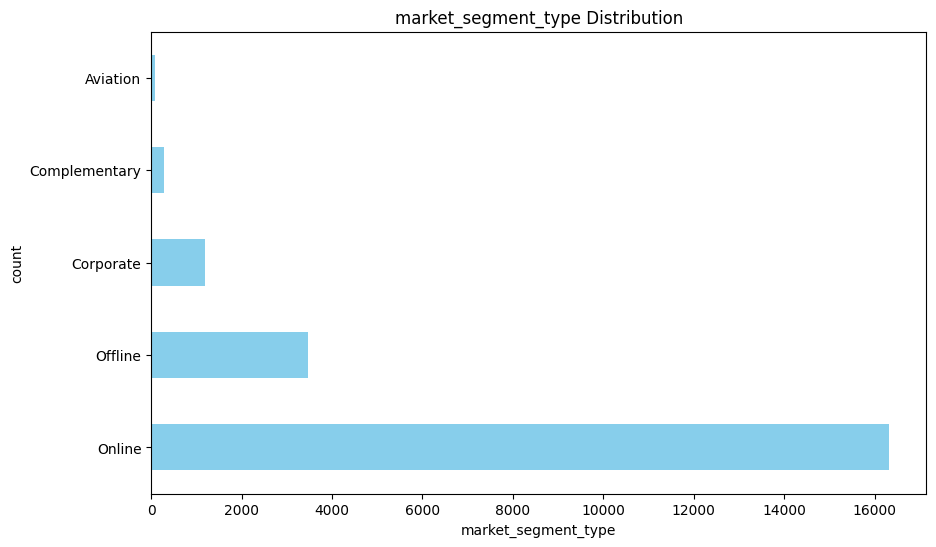

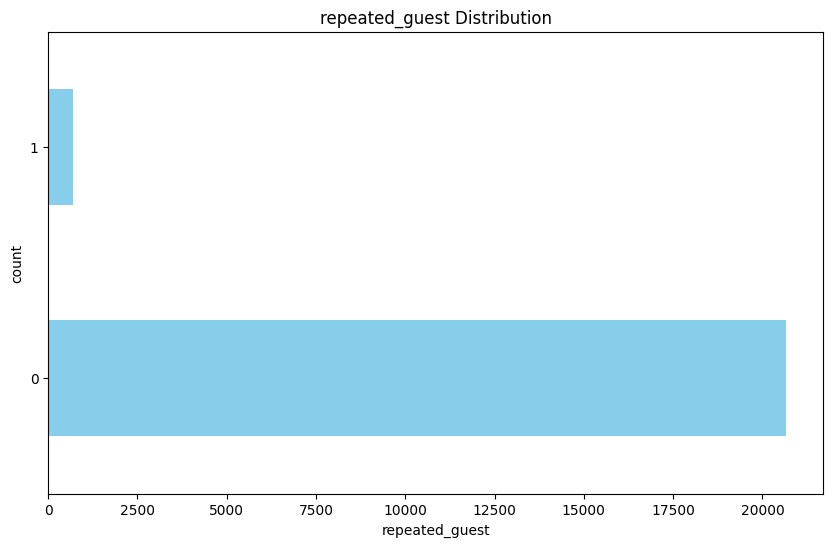

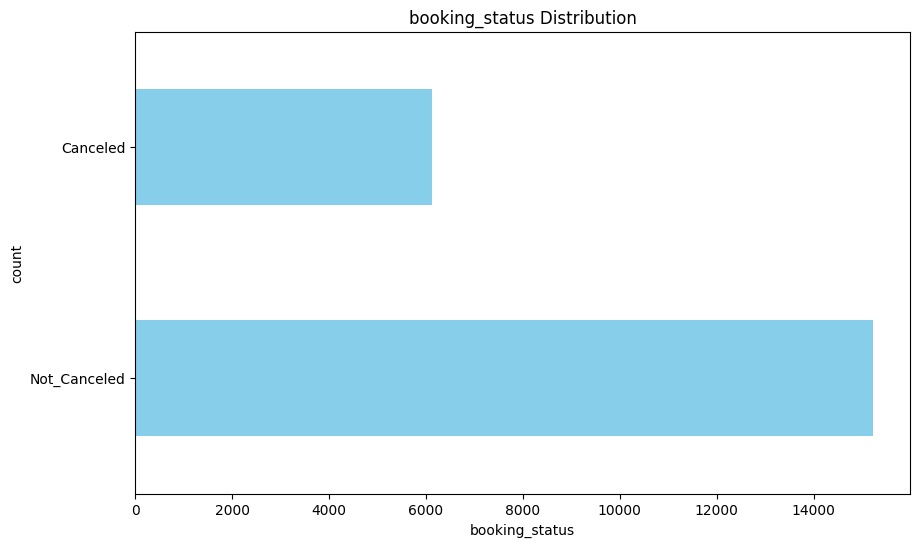

In [77]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='barh', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("count")
    plt.show()
    


1. Meals 1 are cheaper than others, hence the significant difference.
2. Most people do not require car parking.
3. People prefer cheaper rooms, hence Room Type 1 is preferred.
4. Most hotel reservation are done via online.
5. Most people are new, only a few people are repeating.
6. Slighlty imbalance data for booking status.

## Bivariate Analysis

In [78]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1)//2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1629078315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1629078315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28092\1629078315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
C:\Users\Usuario\AppData\Loc

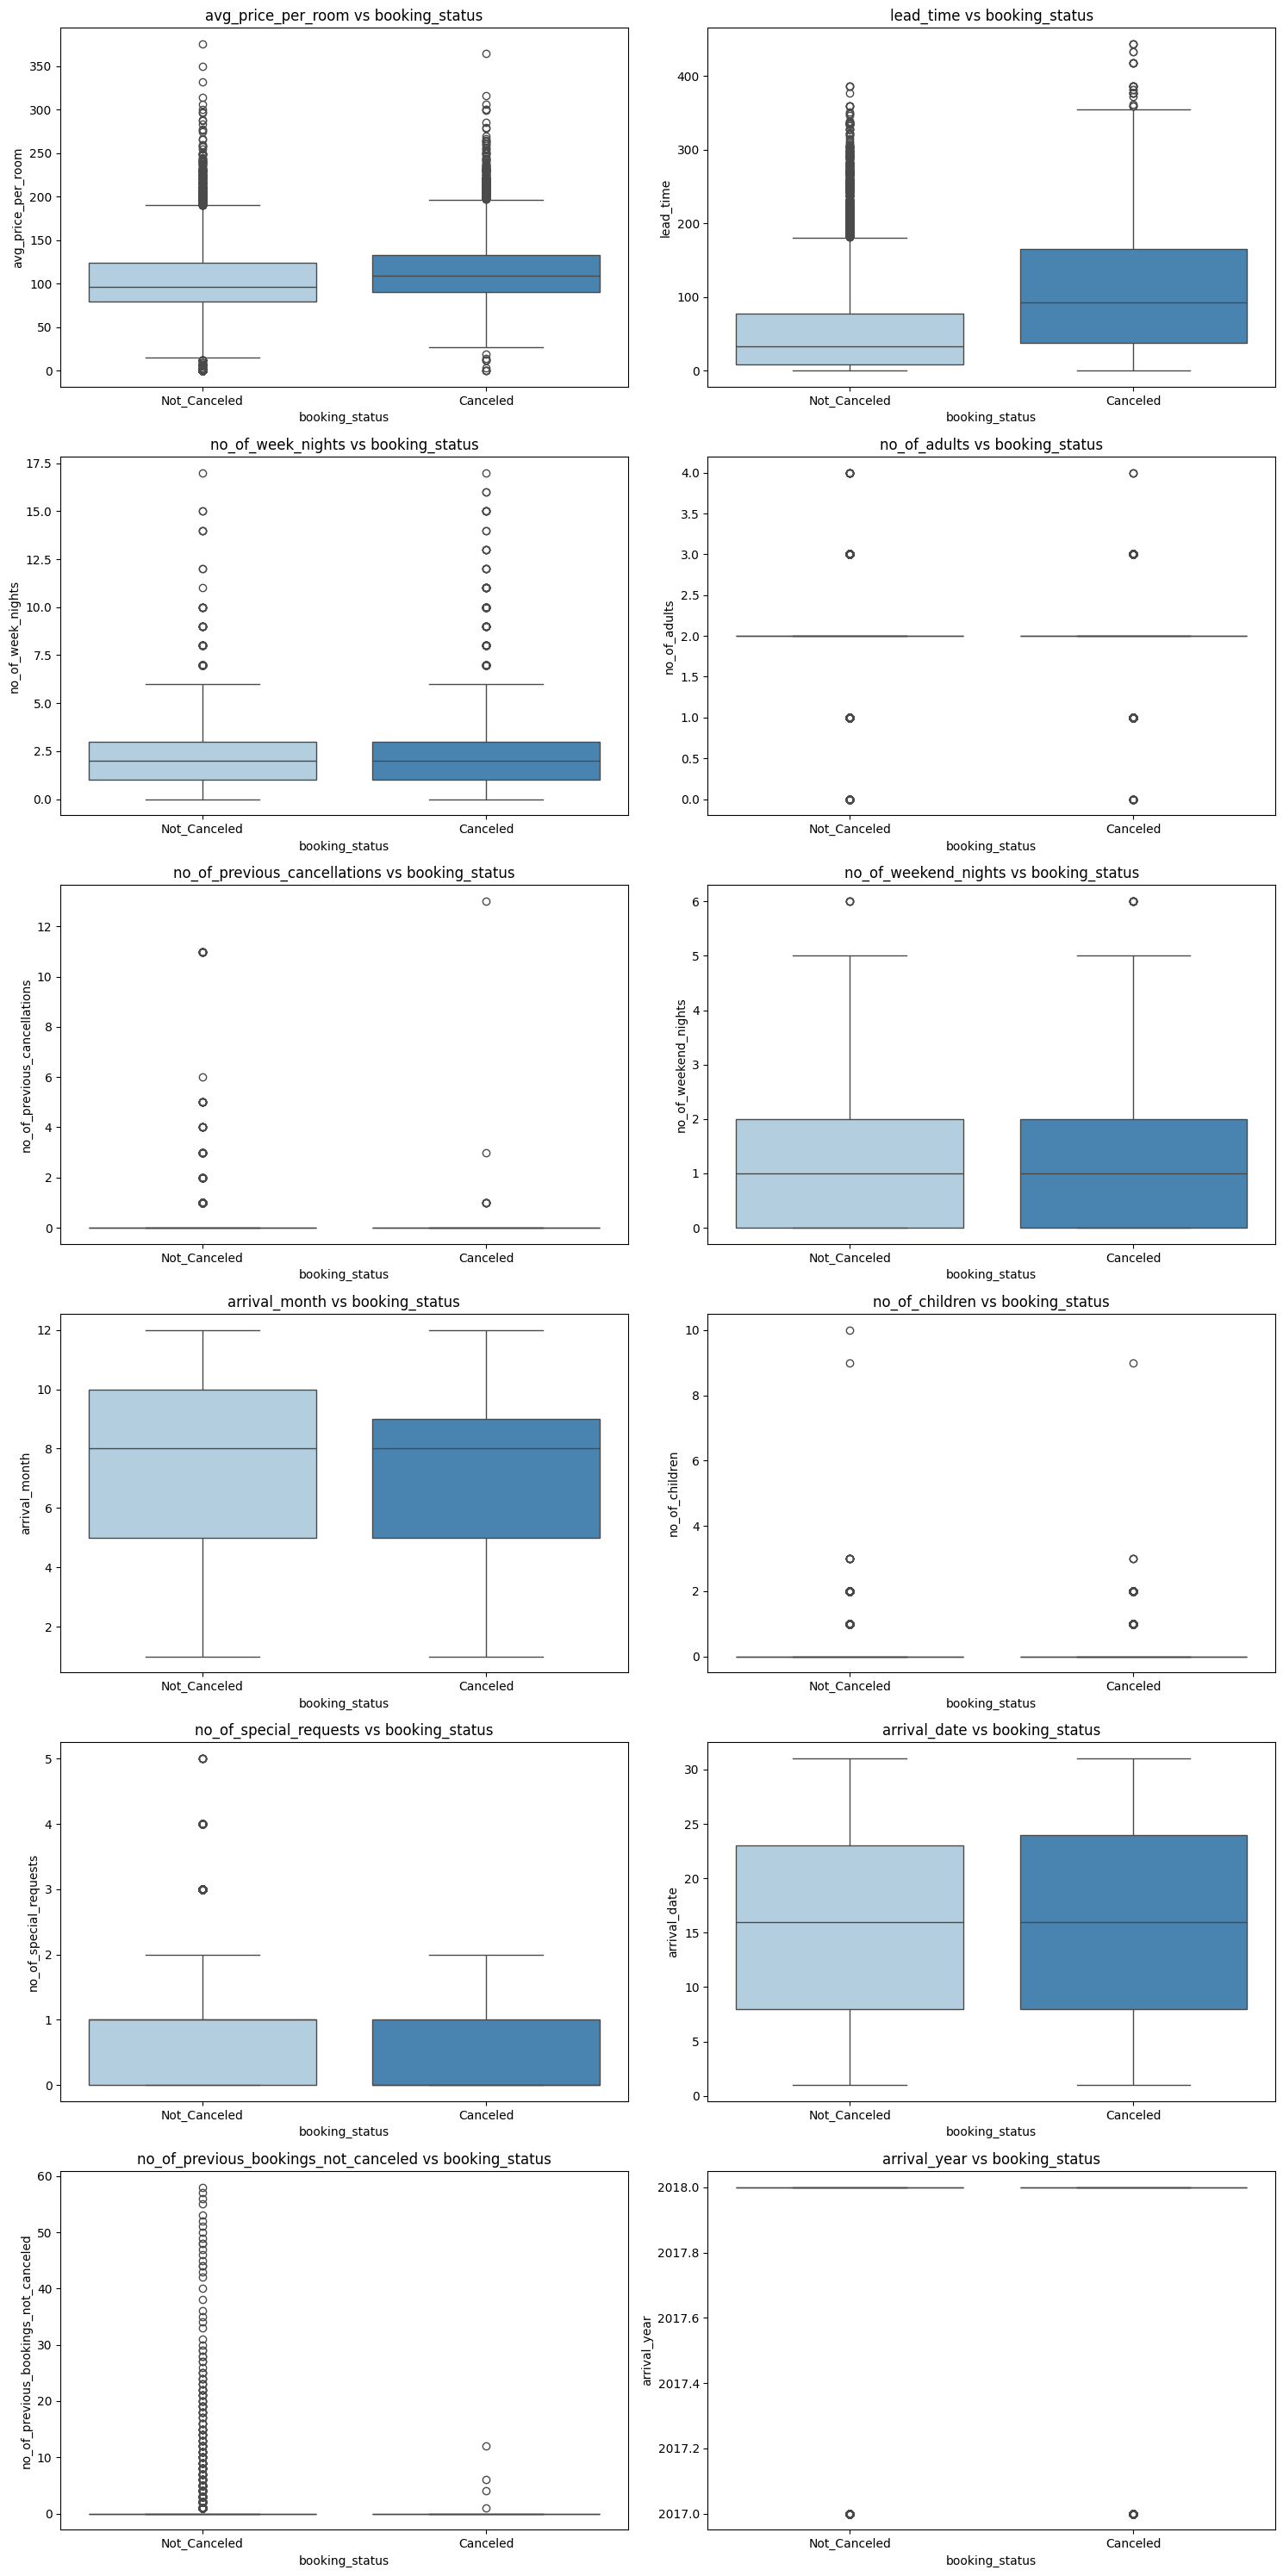

In [79]:
plot_bivariate_num(df, "booking_status", num_cols)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

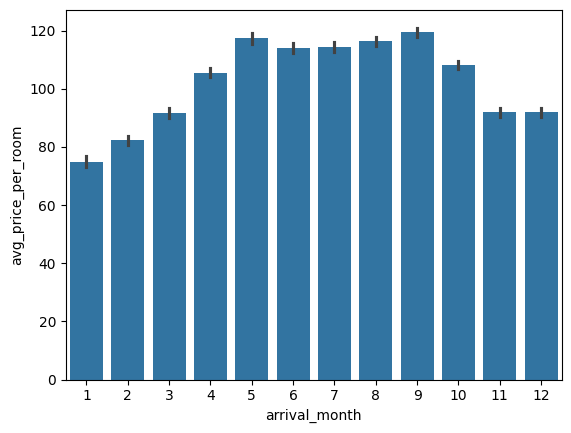

In [80]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)

Hotel dynamically change price depending on the number of people arriving at the hotel and the season, that is why the number of people by month follows a similar distribution to the avg price per room

In [81]:
def plot_bivariate_cat(df, target, cat_features):

    num_features = len(cat_features)
    num_rows = (num_features + 1 )//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):
        sns.countplot(hue=target, x=column, ax=axes[i], data=df, palette="Set2")
        axes[i].set_title(f"{column} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

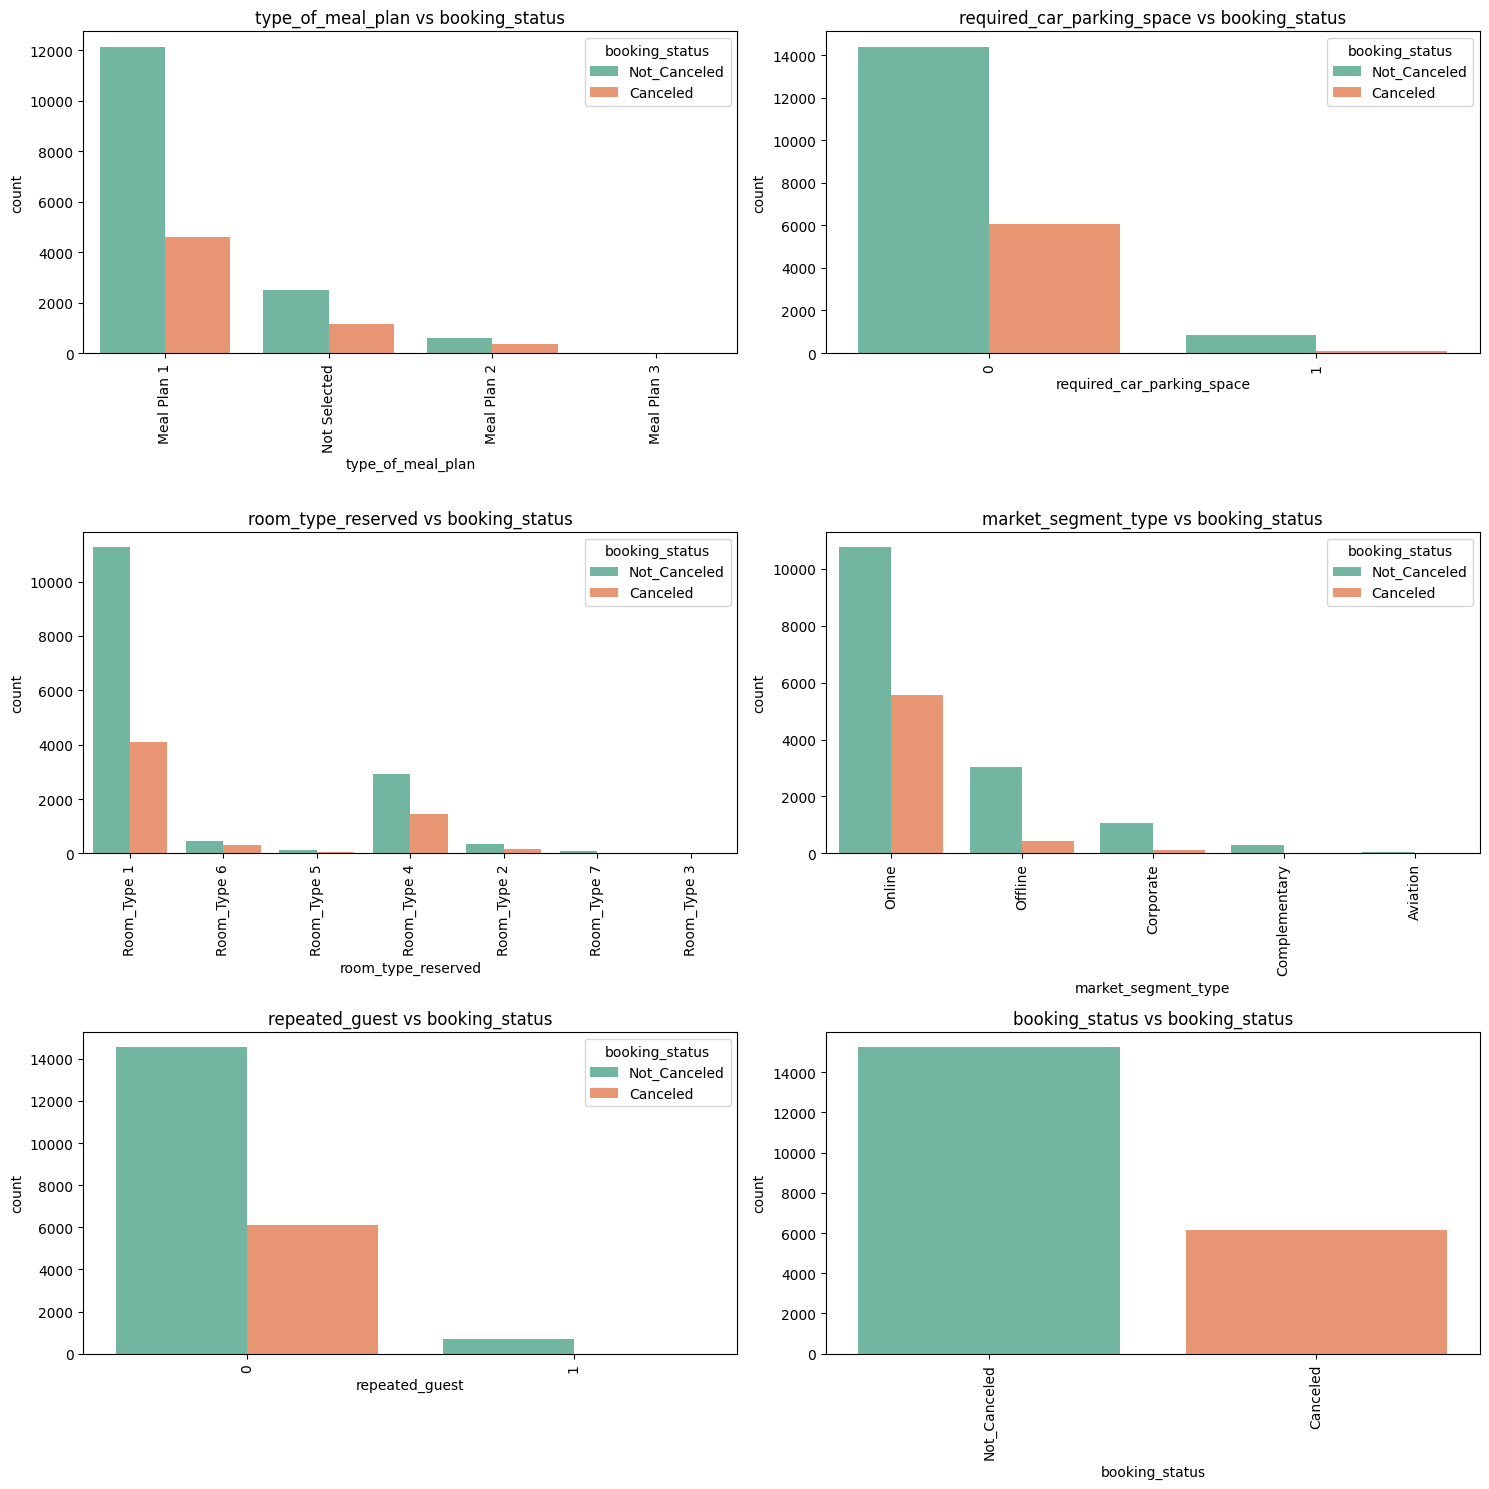

In [82]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

1. No repeated guests have cancelled.
2. Most of the people who cancelled came through online channels.
3. People eating type 2 meal have a higher probability of cancelling.
4. If a person reserved parking, it is unlikely that a person will cancel.
5. When someone reserves type 6 room, there is a higher chance that it will be cancelled. Type room 6 is the most expensive one.
6. if a corporate event is reserved, it is highly unlikely that it will be cancelled.


# Data Processing

In [83]:
df.info()

<class 'pandas.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  str    
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  str    
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type            

Typically, object type columns cannot be passed directly to a ML system, they need to be converted.

In [84]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Mappings are important since they give us information on how to transform back the data to their original form.
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [85]:
df.info()

<class 'pandas.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type            

### Multicolinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


Data does not show significant multicollinearity

## Correlation Matrix

In [87]:
corr = df.corr()

<Axes: >

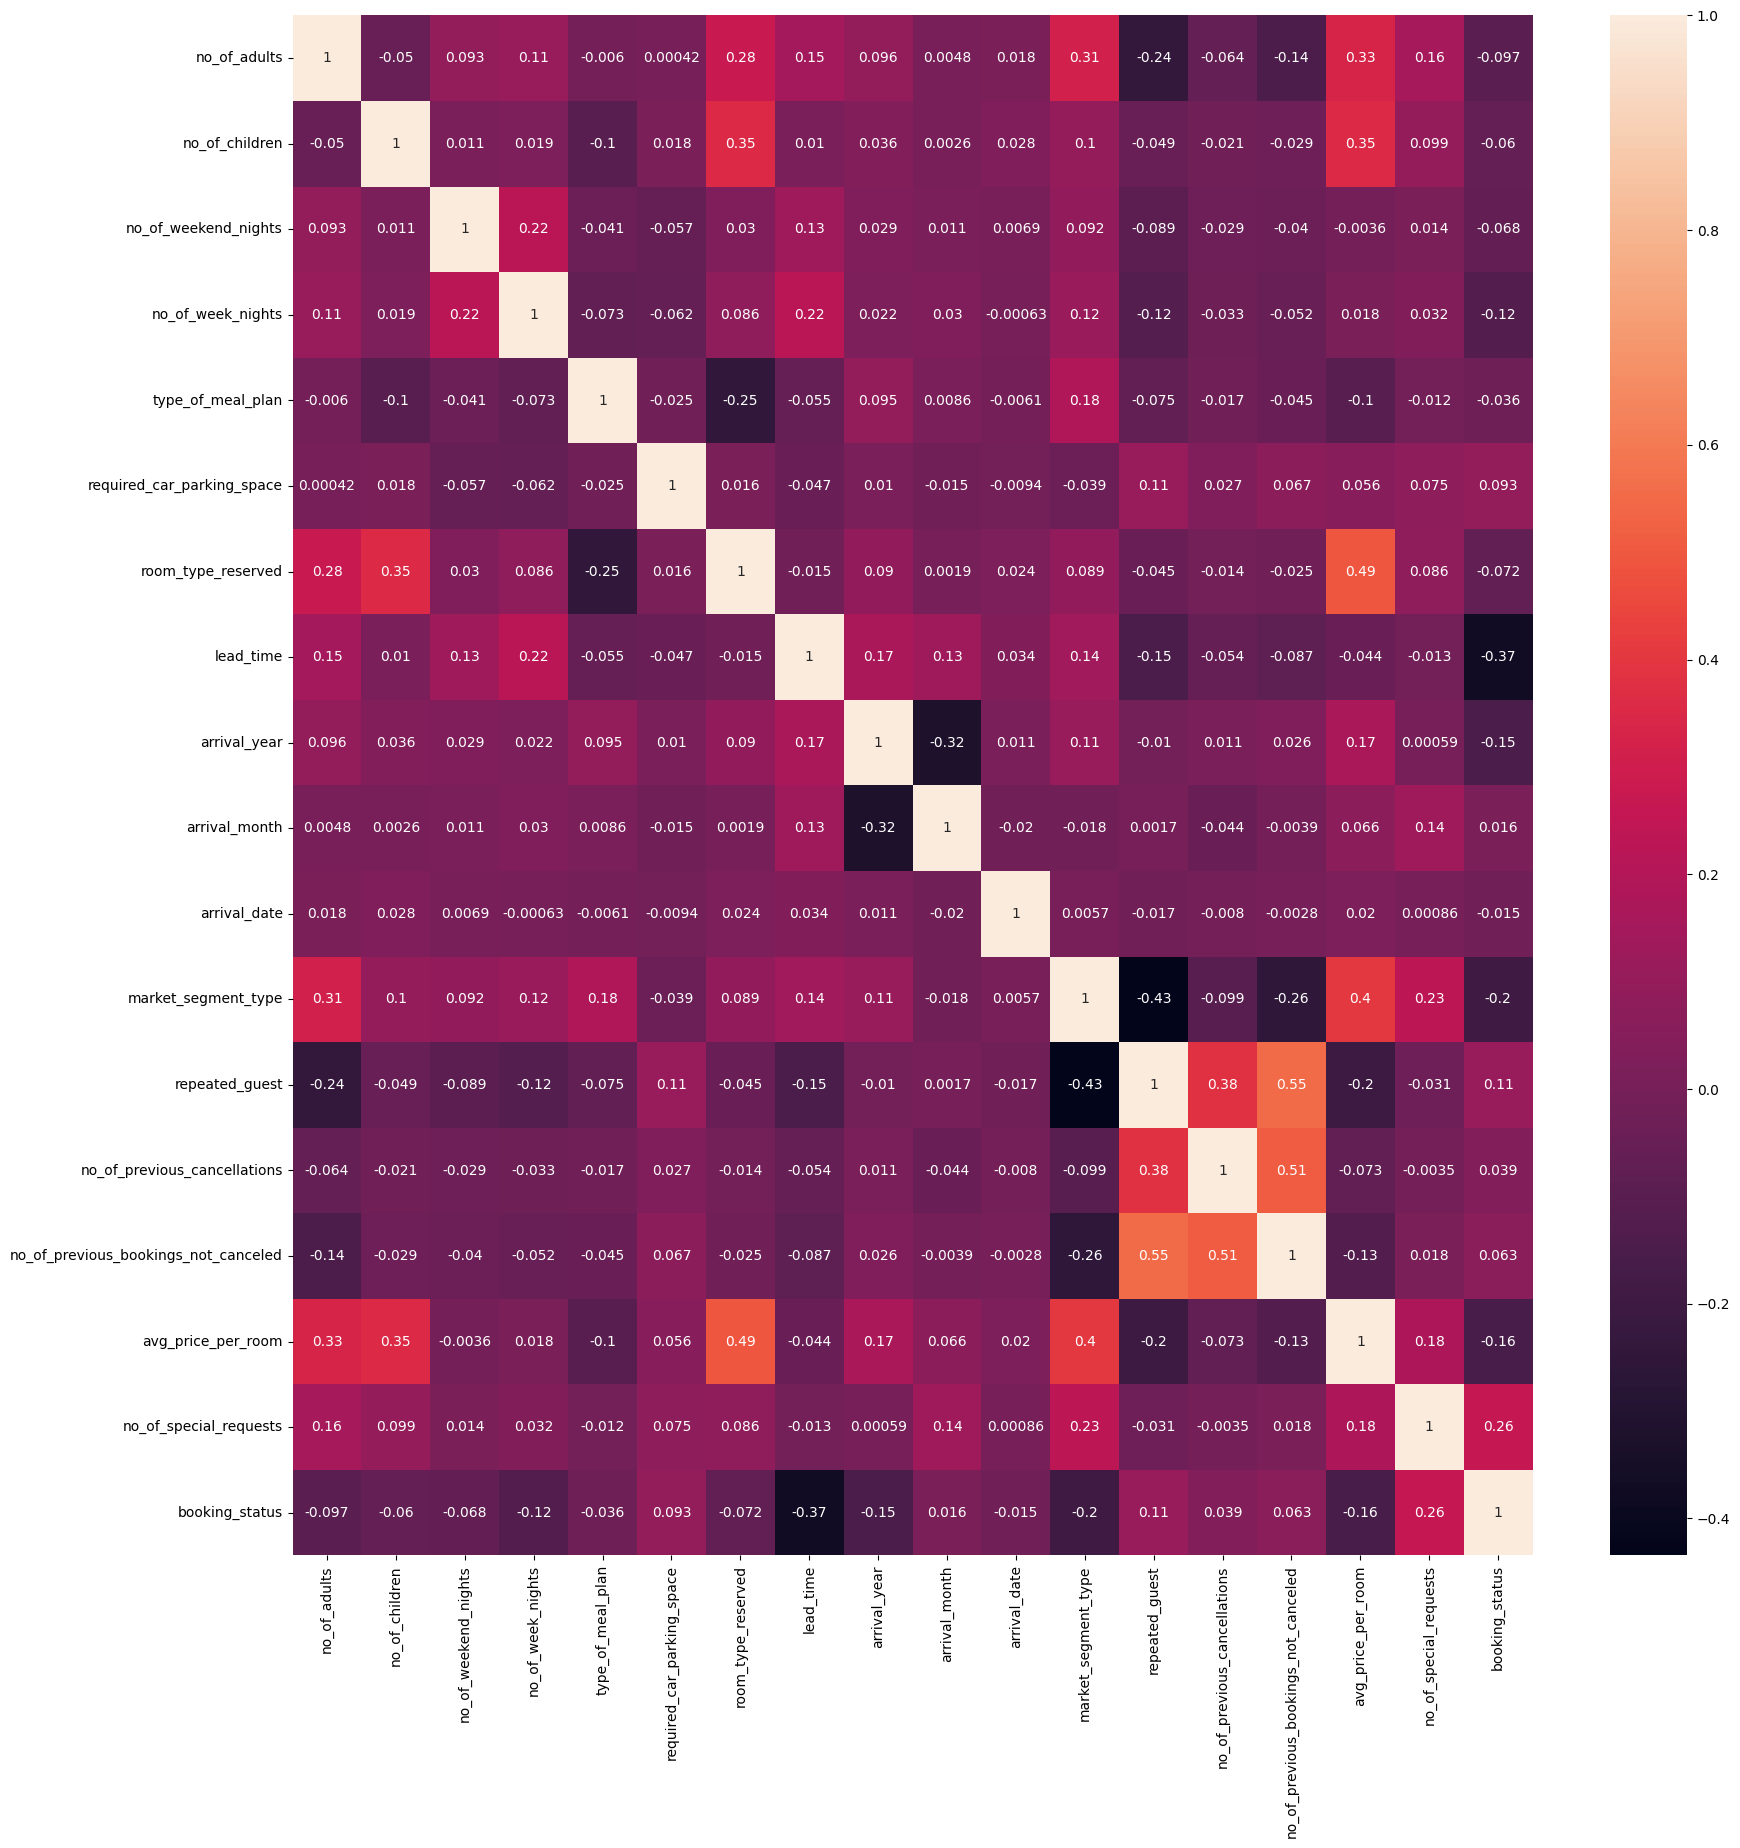

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

### Skewness

In [89]:
skewness = df.skew()
skewness 

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [90]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col]) # Apply log transformation to the skewed features.

In [91]:
skewness = df.skew()
skewness 

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [92]:
### Handle imbalanced data

Undersampling in this case is problematic since we do not have enough data and lowering it can cause problems. So we will opt for oversampling data.

In [94]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_res, y_res = smote.fit_resample(X, y) 

In [96]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [101]:
balanced_df = pd.DataFrame(x_res, columns = X.columns)
balanced_df["booking_status"] = y_res
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


In [102]:
df = balanced_df.copy()

In [ ]:
### DATA LEAKAGE!!!!!!

## Feature Selection

We will select the top 10 features using random forest, a random forest can select the most important features.

In [103]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns="booking_status")
y = df["booking_status"]

In [104]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [117]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}
)

top_feature_importance_df = feature_importance.sort_values(by="importance", ascending=False)

In [118]:
top_10_features = top_feature_importance_df.iloc[:10,:]

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'type_of_meal_plan',
 'room_type_reserved',
 'booking_status']

In [130]:
top_10_features["feature"].values

top_10_df = df.loc[:, list(top_10_features["feature"].values) + ["booking_status"]]

### DATA LEAKAGE!!!!

## Model selection

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [134]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42), 
    "Gradient Boosting": GradientBoostingClassifier(random_state=42), 
    "Ada Boosting": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
}

In [139]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [140]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

c:\Users\Usuario\Documents\PythonProjects\Hotel Reservation\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.897259,0.897011,0.899349,0.898178
1,Gradient Boosting,0.843755,0.826852,0.872638,0.849128
2,Ada Boosting,0.799934,0.809015,0.789251,0.799011
3,Logistic Regression,0.785163,0.796365,0.770684,0.783314
4,Support Vector Machine,0.665518,0.641215,0.763192,0.696907
5,Decision Tree,0.846053,0.855333,0.835831,0.845470
6,Naive Bayes,0.576563,0.905629,0.178176,0.297768
7,KNN,0.780404,0.859038,0.674919,0.755928
8,XGBoost,0.885771,0.880937,0.894137,0.887488
9,LGBM,0.880026,0.869277,0.896743,0.882796


## Complete Training using Random Forest

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [151]:
rf = RandomForestClassifier(random_state=42)

params_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10,50),
    "min_samples_split": randint(2,10), 
    "min_samples_leaf": randint(1,5),
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="accuracy"
)


In [152]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.0s
[CV]

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....001B2D34BFE50>, 'min_samples_leaf': <scipy.stats....001B2D34BD910>, 'min_samples_split': <scipy.stats....001B2D34BCA90>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the var

In [153]:
best_rf_model = random_search.best_estimator_

In [154]:
y_pred = best_rf_model.predict(X_test)

In [156]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8952896766781553
0.890745501285347
0.9029315960912052
0.896797153024911


# Save model

In [158]:
import joblib

In [159]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

### Load Model

In [ ]:
loaded_model = joblib.load("random_forest.pkl")

y_pred = loaded_model.predict(X_train)

accuracy_score(y_train, y_pred)

Pkl File is considerably large, we can use other models like lightgbm that give us similar results but taking up less space. We can deal with the small decrease in precision or accuracy, but in production model size matters. A way to save costs is to use models that take up less space.